In [1]:
%pip install -r utilities/requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Do people who have family history of mental illness tend to be more open to talk about mental ilness and use mental healthcare options provided by sociaty?<br>
As given questionier is quite numerous, after deciding on the direction of this EDA fallowing questions from survey were chosen to focus on: 1,2,3,6,7,12,18,19,28,30,31,32,33,52,53,58,60,62,78,89

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from utilities import queries as q

# Connect to the SQLite database file
conn = sqlite3.connect('Datasets/mental_health.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()





C:\Users\hunde\AppData\Local\Temp\ipykernel_43988\3417707040.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [40]:
query = """
SELECT DISTINCT QuestionText, QuestionID
FROM Question
WHERE QuestionID IN (1, 2, 3, 6, 7, 12, 18, 19, 28, 30, 31, 32, 33, 52, 53, 58, 60, 62, 78, 89);
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()

# Create a DataFrame from the fetched data
unique_questions = pd.DataFrame(rows, columns=['QuestionText', 'QuestionID'])

# Identify duplicate question IDs
duplicate_question_ids = unique_questions.duplicated(subset=['QuestionID'], keep=False)

# Print the unique questions and indicate duplicates
print("Unique Questions:")
for index, row in unique_questions.iterrows():
    if duplicate_question_ids[index]:
        print(f"Duplicate Question ID: {row['QuestionID']}, Question Text: {row['QuestionText']}")
    else:
        print(f"Question ID: {row['QuestionID']}, Question Text: {row['QuestionText']}")

Unique Questions:
Question ID: 1, Question Text: What is your age?
Question ID: 2, Question Text: What is your gender?
Question ID: 3, Question Text: What country do you live in?
Question ID: 6, Question Text: Do you have a family history of mental illness?
Question ID: 7, Question Text: Have you ever sought treatment for a mental health disorder from a mental health professional?
Question ID: 12, Question Text: Would you bring up a mental health issue with a potential employer in an interview?
Question ID: 18, Question Text: Would you feel comfortable discussing a mental health issue with your coworkers?
Question ID: 19, Question Text: Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
Question ID: 22, Question Text: Do you have previous employers?
Question ID: 28, Question Text: Would you have been willing to discuss your mental health with your direct supervisor(s)?
Question ID: 29, Question Text: Would you be willing to bring up a physical h

In [3]:
# Define the SQL query
query = """
SELECT SurveyID, COUNT(*) AS ResponseCount
FROM Answer
GROUP BY SurveyID;
"""

# Execute the SQL query and fetch the results
cursor.execute(query)
rows = cursor.fetchall()

# Get column names from the cursor description
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
answers_df = pd.DataFrame(rows, columns=columns)

answers_df


,SurveyID,ResponseCount
0,2014,32760
1,2016,88238
2,2017,57456
3,2018,31692
4,2019,26752


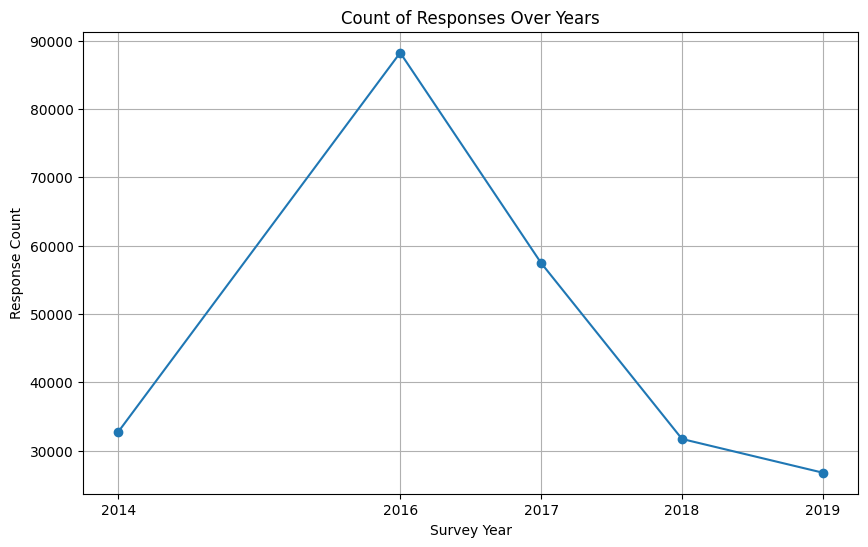

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(answers_df['SurveyID'], answers_df['ResponseCount'], marker='o', linestyle='-')
plt.title('Count of Responses Over Years')
plt.xlabel('Survey Year')
plt.ylabel('Response Count')
plt.xticks(answers_df['SurveyID'])  # Set x-ticks to match survey years
plt.grid(True)
plt.show()

In [1]:
avg_age_by_gender = q.get_gender_distribution()

# Filter out rows where SurveyID is not equal to 2014
filtered_avg_age_by_gender = avg_age_by_gender[avg_age_by_gender['SurveyID'] != 2014]

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_avg_age_by_gender, x='SurveyID', y='Count', hue='GenderGroup', palette='coolwarm', dodge=True)

plt.title('Count of Responses by Gender Over the Years')
plt.xlabel('Survey Year')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


NameError: name 'q' is not defined

way more male than female, look out for proportions.

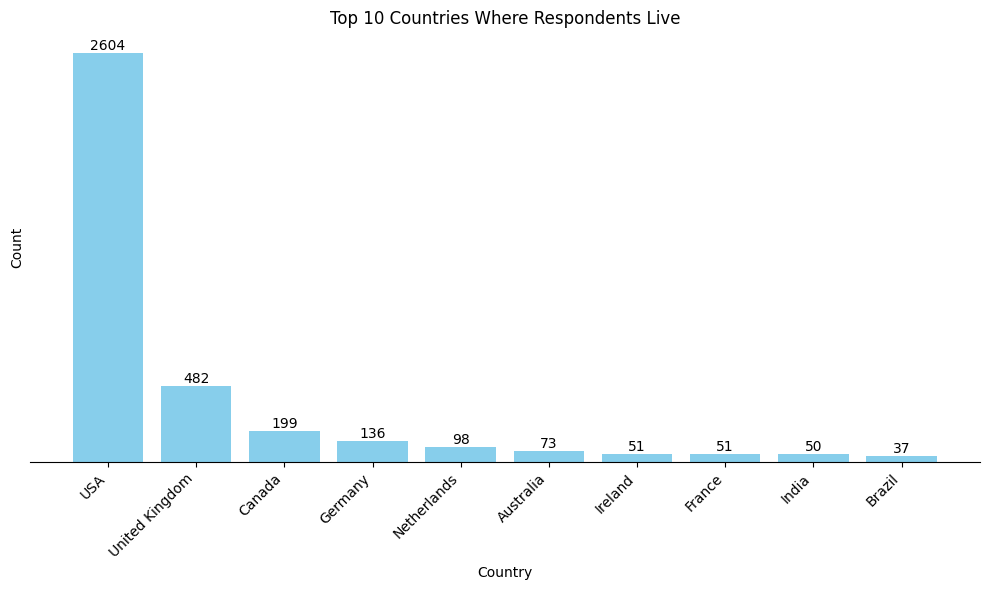

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database file
conn = sqlite3.connect('Datasets/mental_health.sqlite')
cursor = conn.cursor()

# Define the SQL query
query = """
SELECT 
    CASE 
        WHEN LOWER(TRIM(AnswerText)) = '-1' THEN 'No answer'
        WHEN LOWER(TRIM(AnswerText)) LIKE '%united states%' THEN 'USA'
        WHEN LOWER(TRIM(AnswerText)) LIKE '%america%' THEN 'USA'
        ELSE AnswerText
    END AS CleanedAnswer,
    COUNT(*) AS Count
FROM Answer
JOIN Question ON Answer.QuestionID = Question.QuestionID
WHERE Question.QuestionID = 3
GROUP BY CleanedAnswer
ORDER BY Count DESC
LIMIT 10;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
df = pd.DataFrame(rows, columns=['CleanedAnswer', 'Count'])

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df['CleanedAnswer'], df['Count'], color='skyblue')

# Display count values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), 
             ha='center', va='bottom')

# Customize plot appearance
plt.title('Top 10 Countries Where Respondents Live')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().yaxis.set_ticks([])
plt.grid(False)
plt.tight_layout()
plt.show()




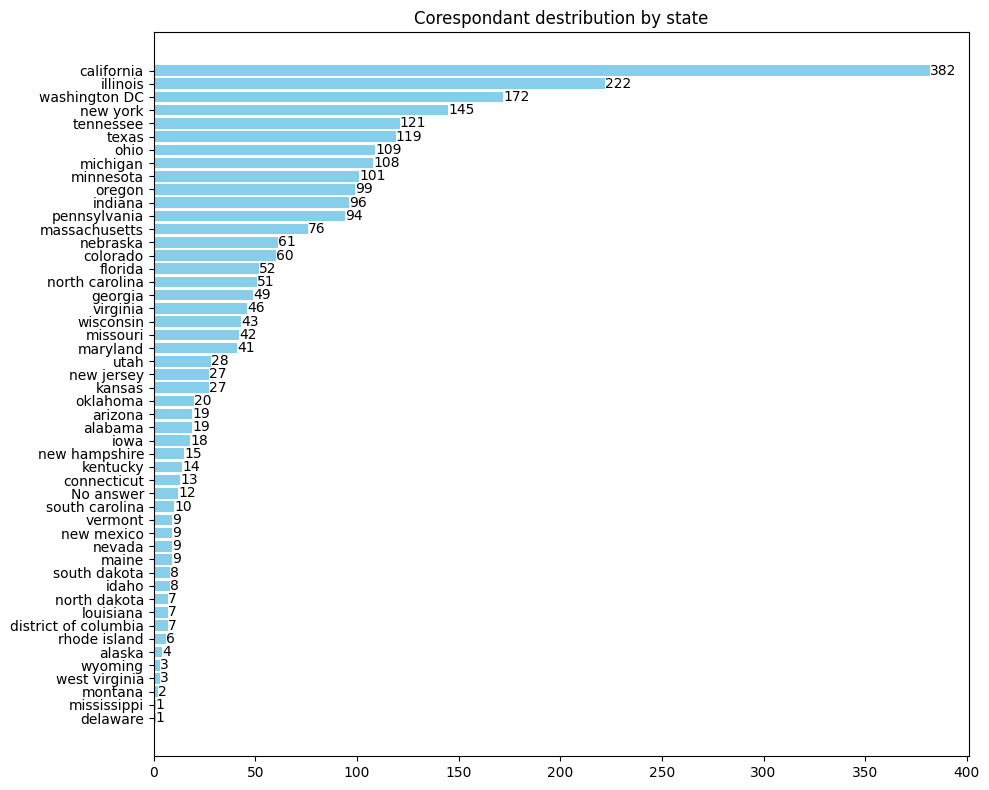

In [39]:
query = """
SELECT 
    CASE 
        WHEN LOWER(TRIM(AnswerText)) = '-1' THEN 'No answer'
        WHEN LOWER(TRIM(AnswerText)) = 'washington' or LOWER(TRIM(AnswerText)) = 'dc' THEN 'washington DC'
        ELSE LOWER(TRIM(AnswerText))
    END AS CleanedAnswer,
    COUNT(*) AS Count
FROM Answer
JOIN (
    SELECT UserID
    FROM Answer
    JOIN Question ON Answer.QuestionID = Question.QuestionID
    WHERE Question.QuestionID = 3 AND LOWER(TRIM(AnswerText)) LIKE '%united states%'
) AS USRespondents ON Answer.UserID = USRespondents.UserID
JOIN Question ON Answer.QuestionID = Question.QuestionID
WHERE Question.QuestionID = 4
GROUP BY CleanedAnswer
ORDER BY Count DESC
LIMIT 50;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
df = pd.DataFrame(rows, columns=['CleanedAnswer', 'Count'])

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(df['CleanedAnswer'], df['Count'], color='skyblue')

# Display count values next to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
             va='center')

# Customize plot appearance
plt.title('Corespondant destribution by state')
plt.xlabel('')
plt.ylabel('')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.grid(False)
plt.tight_layout()
plt.show()

most people didint answer, but by looking at those who did, we can see that this survey did quite well accounting for different regions. If we ignore people that chose not to answer, we can see that survay was did from east coast till west coast of usa.

In [76]:
query = """
SELECT
    a.QuestionID,
    q.QuestionText,
    a.SurveyID,
    a.AnswerText
FROM
    Answer a
JOIN
    Question q ON a.QuestionID = q.QuestionID
WHERE
    q.QuestionID IN (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56)
    AND a.SurveyID IN (2016, 2017, 2018, 2019)
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
survey_df = pd.DataFrame(rows, columns=columns)
survey_df.to_csv('survey_questions_2014.csv', index=False)

In [54]:
query = """
SELECT DISTINCT
    a.SurveyID,
    q.QuestionID
FROM
    Answer a
JOIN
    Question q ON a.QuestionID = q.QuestionID
WHERE
    a.SurveyID = 2016;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
survey_df = pd.DataFrame(rows, columns=columns)
survey_df

,SurveyID,questionid
0,2016,1
1,2016,2
2,2016,3
3,2016,4
4,2016,5
5,2016,6
6,2016,7
7,2016,8
8,2016,9
9,2016,10


In [72]:
query = """
SELECT
    a.QuestionID,
    q.QuestionText,
    a.SurveyID,
    a.AnswerText,
    COUNT(DISTINCT a.UserID) AS TotalRespondents
FROM
    Answer a
JOIN
    Question q ON a.QuestionID = q.QuestionID
WHERE
    a.SurveyID IN (2016, 2017, 2018, 2019)
    AND q.QuestionID IN (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56)
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
survey_df = pd.DataFrame(rows, columns=columns)
survey_df.head(50)

,QuestionID,questiontext,SurveyID,AnswerText,TotalRespondents
0,1,What is your age?,2016,39,2958


In [59]:
query = """
SELECT DISTINCT
    a.SurveyID,
    q.QuestionID
FROM
    Answer a
JOIN
    Question q ON a.QuestionID = q.QuestionID
WHERE
    a.SurveyID = 2017;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
survey_df = pd.DataFrame(rows, columns=columns)
survey_df.head(50)

,SurveyID,questionid
0,2017,1
1,2017,2
2,2017,3
3,2017,4
4,2017,5
5,2017,6
6,2017,7
7,2017,8
8,2017,9
9,2017,10


In [60]:
query = """
SELECT DISTINCT
    a.SurveyID,
    q.QuestionID
FROM
    Answer a
JOIN
    Question q ON a.QuestionID = q.QuestionID
WHERE
    a.SurveyID = 2018;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
survey_df = pd.DataFrame(rows, columns=columns)
survey_df

,SurveyID,questionid
0,2018,1
1,2018,2
2,2018,3
3,2018,4
4,2018,5
...,...,...
71,2018,85
72,2018,86
73,2018,87
74,2018,88


In [61]:
query = """
SELECT DISTINCT
    a.SurveyID,
    q.QuestionID
FROM
    Answer a
JOIN
    Question q ON a.QuestionID = q.QuestionID
WHERE
    a.SurveyID = 2019;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
survey_df = pd.DataFrame(rows, columns=columns)
survey_df

,SurveyID,questionid
0,2019,1
1,2019,2
2,2019,3
3,2019,4
4,2019,5
...,...,...
71,2019,85
72,2019,86
73,2019,87
74,2019,88


In [85]:
query = """
SELECT QuestionText,QuestionID

FROM Question
WHERE
    QuestionID IN (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56)
"""

cursor.execute(query)

# Fetch the results
rows = cursor.fetchall()
# Create a DataFrame from the fetched data
columns = [col[0] for col in cursor.description]

# Create a DataFrame from the fetched data
survey_df = pd.DataFrame(rows, columns=columns)
survey_df.to_csv('survey_questions_chosen.csv', index=False)